In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_excel("Documents\E Commerce Dataset.xlsx")

In [3]:
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.shape

(5630, 20)

In [6]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)].shape[0]

1856

In [8]:
df.isnull().sum().sum()

1856

In [9]:
#there are one missing value in 1856 rows.. so we can't drop 1856 rows because it will be too much loss of data

In [10]:
#data.dtypes[data.dtypes!='object'].index

In [11]:
count = []
hist = []
for i in df.columns:
    unique_value = df[i].nunique()
    if unique_value <= 20:
        count.append(i)
    else:
        hist.append(i)    

C:\Users\Mahek\AppData\Local\Temp\ipykernel_17104\3783251550.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Mahek\AppData\Local\Temp\ipykernel_17104\3783251550.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Mahek\AppData\Local\Temp\ipykernel_17104\3783251550.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Mahek\AppData\Local\Temp\ipykernel_17104\3783251550.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Mahek\AppData\Local\Temp\ipykernel_17104\3783251550.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Mahek\AppData\Local\Temp\ipykernel_17104\3783251550.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Mahek\AppData\Local\Temp\ipykernel_17104\3783251550.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Mahek\AppDa

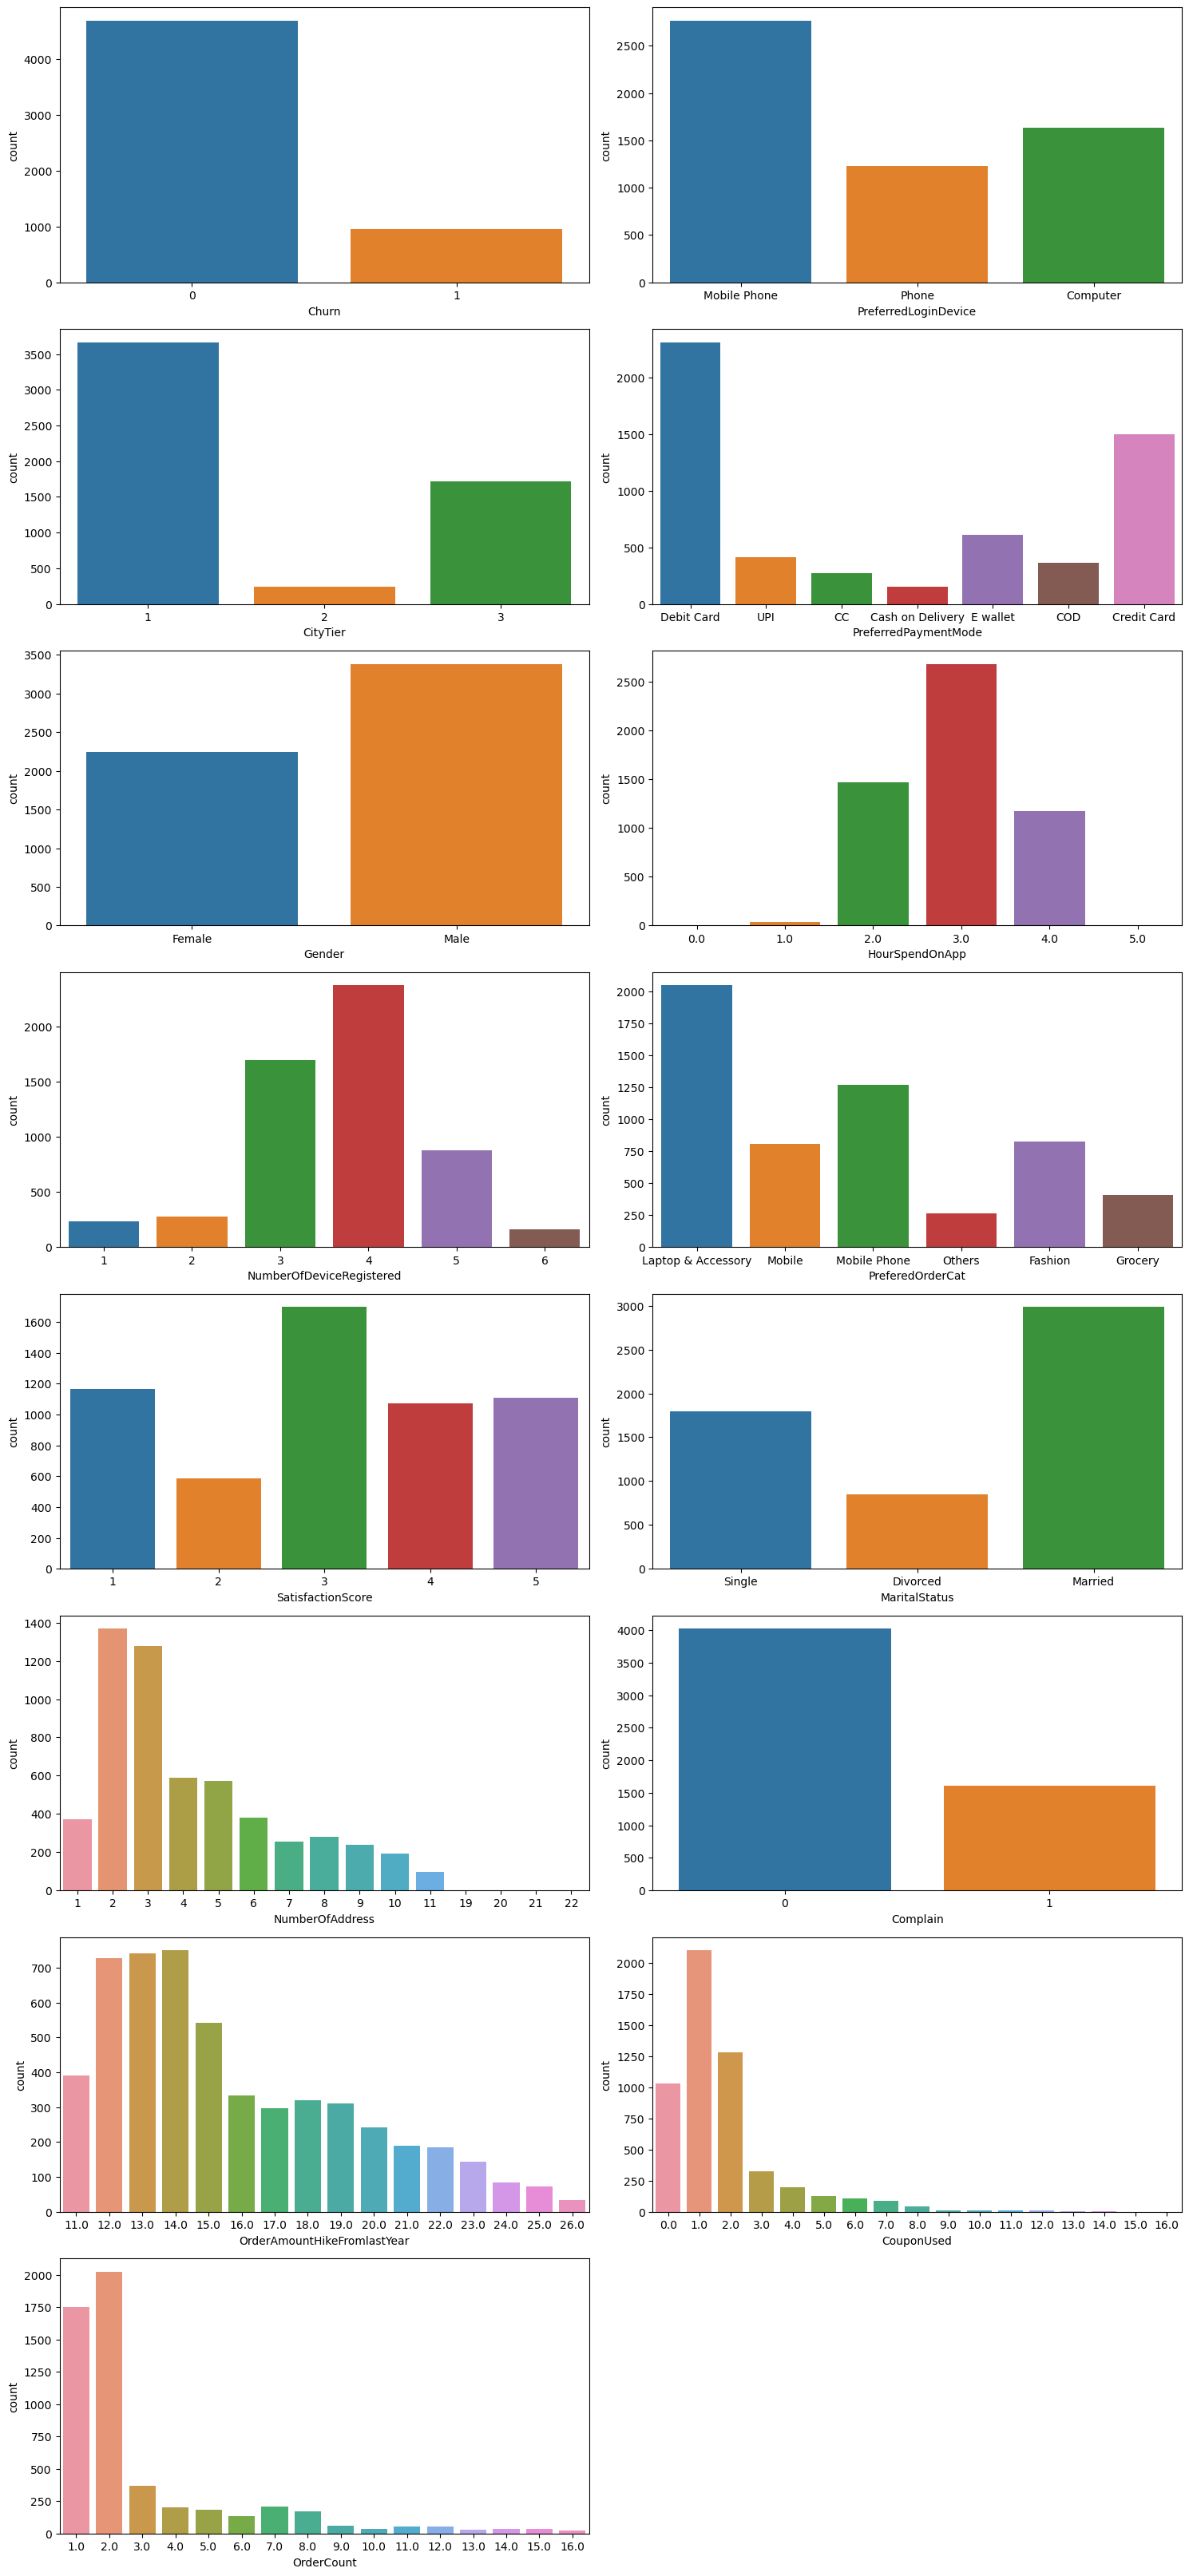

In [12]:
plt.figure(figsize=(15,40))
plotnum = 1
for j in count:
    plt.subplot(10,2,plotnum)
    sns.countplot(data=df, x=j)
    plotnum += 1
    plt.tight_layout()
    

# UNIVARIATE ANALYSIS

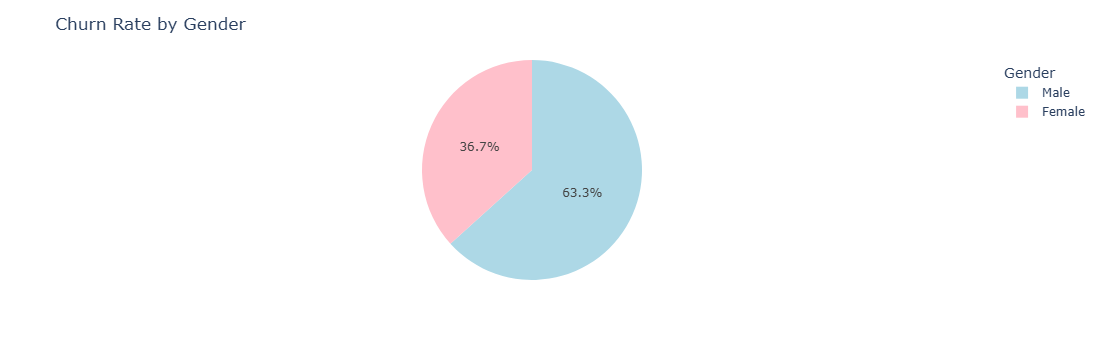

In [13]:
import plotly.express as px

# Create figure
fig = px.pie(df, values='Churn', names='Gender')
fig.update_traces(marker=dict(colors=['pink ', 'lightblue']))

# Update layout
fig.update_layout(
  title='Churn Rate by Gender',
  legend_title='Gender'
)

# Show plot
fig.show()

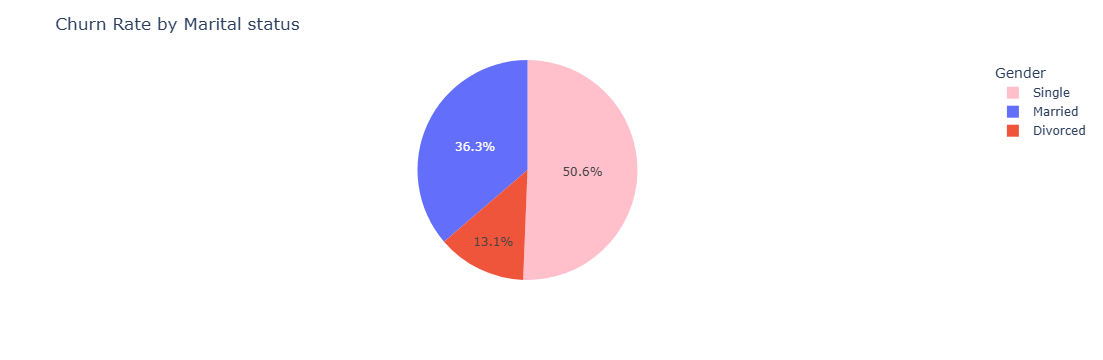

In [14]:
import plotly.express as px

# Create figure
fig = px.pie(df, values='Churn', names='MaritalStatus')
fig.update_traces(marker=dict(colors=['pink ', 'lightblue', 'yellow']))

# Update layout
fig.update_layout(
  title='Churn Rate by Marital status',
  legend_title='Gender'
)

# Show plot
fig.show()

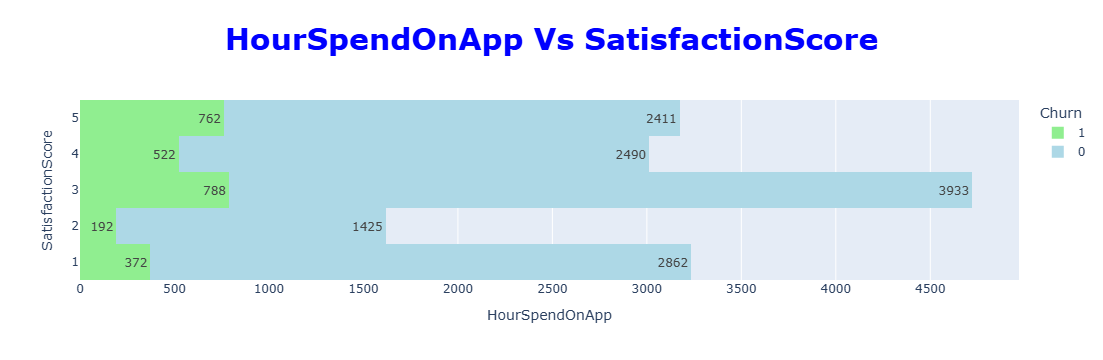

In [15]:
import matplotlib.pyplot as plt

# plot
fig = px.histogram(df, x="HourSpendOnApp", y="SatisfactionScore", orientation="h", color="Churn" ,text_auto= True , title="<b>"+'HourSpendOnApp Vs SatisfactionScore' , color_discrete_sequence = ['lightgreen','lightblue','yelow'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="blue",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='HourSpendOnApp',
yaxis_title='SatisfactionScore',
)
fig.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot`

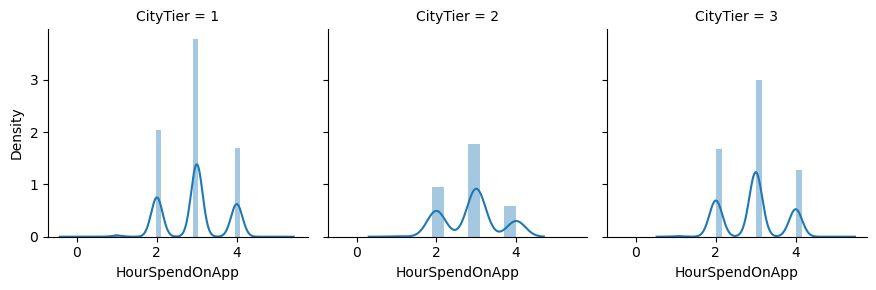

In [16]:
g = sns.FacetGrid(df, col='CityTier')
g.map(sns.distplot, 'HourSpendOnApp')

In [17]:
import matplotlib.pyplot as plt

# plot
fig = px.histogram(df, x="HourSpendOnApp", y="OrderCount", orientation="h", color="Churn" ,text_auto= True , title="<b>"+'HourSpendOnApp Vs OrderCount' , color_discrete_sequence = ['lightgreen','lightblue','yelow'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="blue",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='HourSpendOnApp',
yaxis_title='OrderCount',
)
fig.show()

In [18]:
data=df.copy()

In [19]:
data.dtypes[data.dtypes!='object'].index

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [20]:
data.dtypes[data.dtypes=='object'].index

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [21]:
data.rename(columns={'PreferedOrderCat':'PreferredOrderCategory',
                     'OrderAmountHikeFromlastYear':'OrderCountHikeFromLastYear'},inplace=True)

In [22]:
def unique(col):
    x=data[col].unique()
    return x

In [23]:
data['CustomerID'].duplicated().sum()

0

In [24]:
unique('Tenure')

array([ 4., nan,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2.,
       30.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

In [25]:
unique('PreferredLoginDevice')

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [26]:
unique('CityTier')

array([3, 1, 2], dtype=int64)

In [27]:
unique('PreferredPaymentMode')


array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [28]:
unique('Gender')

array(['Female', 'Male'], dtype=object)

In [29]:
unique('PreferredOrderCategory')

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [30]:
unique('SatisfactionScore')

array([2, 3, 5, 4, 1], dtype=int64)

In [31]:
unique('MaritalStatus')

array(['Single', 'Divorced', 'Married'], dtype=object)

In [32]:
unique('Complain')

array([1, 0], dtype=int64)

In [33]:
data.rename(columns={'PreferedOrderCat':'PreferredOrderCategory',
                     'OrderAmountHikeFromlastYear':'OrderCountHikeFromLastYear'},inplace=True)
data['PreferredLoginDevice']=data['PreferredLoginDevice'].replace(['Mobile Phone','Phone'],'Mobile')
data['PreferredPaymentMode']=data['PreferredPaymentMode'].replace({'CC':'Credit Card','COD':'Cash on Delivery'})
data['PreferredOrderCategory']=data['PreferredOrderCategory'].replace('Mobile','Mobile Phone')

In [34]:
data2=data.copy()

In [35]:
data2.isnull().sum()

CustomerID                      0
Churn                           0
Tenure                        264
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome               251
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                255
NumberOfDeviceRegistered        0
PreferredOrderCategory          0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderCountHikeFromLastYear    265
CouponUsed                    256
OrderCount                    258
DaySinceLastOrder             307
CashbackAmount                  0
dtype: int64

In [36]:
data2['Tenure'].sort_values(ascending=True).value_counts()

Tenure
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
51.0      1
60.0      1
61.0      1
Name: count, dtype: int64

# MULTIVARIATE ANALYSIS

In [37]:
def crosstab(x,y,z):
    ct=pd.crosstab(data[x],data[y],normalize=z)
    return ct

In [38]:
crosstab('CityTier','PreferredLoginDevice','index')

PreferredLoginDevice  Computer    Mobile
CityTier                                
1                     0.291871  0.708129
2                     0.264463  0.735537
3                     0.290360  0.709640

In [39]:
crosstab('CityTier','PreferredPaymentMode','index')

PreferredPaymentMode  Cash on Delivery  Credit Card  Debit Card  E wallet  \
CityTier                                                                    
1                             0.099836     0.376978    0.457174  0.000000   
2                             0.066116     0.206612    0.256198  0.000000   
3                             0.076655     0.198606    0.334495  0.356562   

PreferredPaymentMode       UPI  
CityTier                        
1                     0.066012  
2                     0.471074  
3                     0.033682

In [40]:
crosstab('CityTier','PreferredOrderCategory','index')

PreferredOrderCategory   Fashion   Grocery  Laptop & Accessory  Mobile Phone  \
CityTier                                                                       
1                       0.132570  0.072559            0.292962      0.450627   
2                       0.099174  0.057851            0.198347      0.537190   
3                       0.183508  0.075494            0.538908      0.173055   

PreferredOrderCategory    Others  
CityTier                          
1                       0.051282  
2                       0.107438  
3                       0.029036

In [41]:
crosstab('Gender','MaritalStatus','index')

MaritalStatus  Divorced   Married    Single
Gender                                     
Female         0.154942  0.507569  0.337489
Male           0.147754  0.545508  0.306738

In [42]:
crosstab('Gender','PreferredOrderCategory','index')

PreferredOrderCategory   Fashion   Grocery  Laptop & Accessory  Mobile Phone  \
Gender                                                                         
Female                  0.157614  0.088157            0.375779      0.340160   
Male                    0.139480  0.062648            0.356383      0.388889   

PreferredOrderCategory   Others  
Gender                           
Female                  0.03829  
Male                    0.05260

In [43]:
crosstab('PreferredLoginDevice','PreferredPaymentMode',True)

PreferredPaymentMode  Cash on Delivery  Credit Card  Debit Card  E wallet  \
PreferredLoginDevice                                                        
Computer                      0.024512     0.092362    0.126110  0.026288   
Mobile                        0.066785     0.222735    0.284902  0.082771   

PreferredPaymentMode       UPI  
PreferredLoginDevice            
Computer              0.020959  
Mobile                0.052575

In [44]:
crosstab('Complain','CityTier','columns')

CityTier         1         2         3
Complain                              
0         0.715221  0.743802  0.710801
1         0.284779  0.256198  0.289199

In [45]:
crosstab('CityTier','Churn','index')

Churn            0         1
CityTier                    
1         0.854883  0.145117
2         0.801653  0.198347
3         0.786295  0.213705

In [46]:
crosstab('Gender','Churn','index')

Churn          0         1
Gender                    
Female  0.845058  0.154942
Male    0.822695  0.177305

In [47]:
crosstab('PreferredOrderCategory','Churn','index')

Churn                          0         1
PreferredOrderCategory                    
Fashion                 0.845036  0.154964
Grocery                 0.951220  0.048780
Laptop & Accessory      0.897561  0.102439
Mobile Phone            0.725962  0.274038
Others                  0.924242  0.075758

In [48]:
crosstab('SatisfactionScore','Churn','index')

Churn                     0         1
SatisfactionScore                    
1                  0.884880  0.115120
2                  0.873720  0.126280
3                  0.828033  0.171967
4                  0.828678  0.171322
5                  0.761733  0.238267

In [49]:
crosstab('Complain','Churn','index')

Churn            0         1
Complain                    
0         0.890710  0.109290
1         0.683292  0.316708

In [50]:
data2 = data2[data2['Tenure'] < 50.0] 

In [51]:
data2['Tenure'].unique()

array([ 4.,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2., 30.,
        1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15., 22.,
       27., 16., 12., 21., 17., 31.])

In [52]:
data2.dtypes

CustomerID                      int64
Churn                           int64
Tenure                        float64
PreferredLoginDevice           object
CityTier                        int64
WarehouseToHome               float64
PreferredPaymentMode           object
Gender                         object
HourSpendOnApp                float64
NumberOfDeviceRegistered        int64
PreferredOrderCategory         object
SatisfactionScore               int64
MaritalStatus                  object
NumberOfAddress                 int64
Complain                        int64
OrderCountHikeFromLastYear    float64
CouponUsed                    float64
OrderCount                    float64
DaySinceLastOrder             float64
CashbackAmount                float64
dtype: object

In [53]:
def mean(col):
    data2[col].fillna(round(data2[col].mean(),2),inplace=True)
def median(col):
    data2[col].fillna(data2[col].median(),inplace=True)    

In [54]:
mean('Tenure')
mean('WarehouseToHome')
mean('HourSpendOnApp')
mean('OrderCountHikeFromLastYear')


In [55]:
median('CouponUsed')
median('OrderCount')
median('DaySinceLastOrder')

In [56]:
data2.isnull().sum()

CustomerID                    0
Churn                         0
Tenure                        0
PreferredLoginDevice          0
CityTier                      0
WarehouseToHome               0
PreferredPaymentMode          0
Gender                        0
HourSpendOnApp                0
NumberOfDeviceRegistered      0
PreferredOrderCategory        0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
OrderCountHikeFromLastYear    0
CouponUsed                    0
OrderCount                    0
DaySinceLastOrder             0
CashbackAmount                0
dtype: int64

In [57]:
unique("PreferredLoginDevice")

array(['Mobile', 'Computer'], dtype=object)

In [58]:
obj_data=data2[data2.dtypes[data2.dtypes=='object'].index]
num_data=data2[data2.dtypes[data2.dtypes!='object'].index]

In [59]:
def outlier_min_cap(x):
    """This function performs lower side outlier capping at 0.3% for the given column (arguement - 'x') of dataframe 
    'num_data'"""
    num_data[x]=np.where(num_data[x]<num_data[x].quantile(.003),num_data[x].quantile(.003),num_data[x])
outlier_min_cap('CashbackAmount')

C:\Users\Mahek\AppData\Local\Temp\ipykernel_17104\2010158591.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
def outlier_max_cap(x):
    """This function performs upper side outlier capping at 99.7% for the given column (arguement - 'x') of dataframe 
    'num_data'"""
    num_data[x]=np.where(num_data[x]>num_data[x].quantile(.997),num_data[x].quantile(.997),num_data[x])
    return x

In [61]:
outlier_max_cap('Tenure')
outlier_max_cap('WarehouseToHome')
outlier_max_cap('NumberOfAddress')
outlier_max_cap('DaySinceLastOrder')

C:\Users\Mahek\AppData\Local\Temp\ipykernel_17104\2345889696.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mahek\AppData\Local\Temp\ipykernel_17104\2345889696.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mahek\AppData\Local\Temp\ipykernel_17104\2345889696.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

'DaySinceLastOrder'

In [62]:
final=pd.concat([obj_data,num_data],axis=1)

In [63]:
final.head()

PreferredLoginDevice PreferredPaymentMode  Gender PreferredOrderCategory  \
0               Mobile           Debit Card  Female     Laptop & Accessory   
3               Mobile           Debit Card    Male     Laptop & Accessory   
4               Mobile          Credit Card    Male           Mobile Phone   
5             Computer           Debit Card  Female           Mobile Phone   
8               Mobile             E wallet    Male           Mobile Phone   

  MaritalStatus  CustomerID  Churn  Tenure  CityTier  WarehouseToHome  \
0        Single       50001      1     4.0         3              6.0   
3        Single       50004      1     0.0         3             15.0   
4        Single       50005      1     0.0         1             12.0   
5        Single       50006      1     0.0         1             22.0   
8      Divorced       50009      1    13.0         3              9.0   

   HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
0            3.00                         3                  2   
3            2.00                         4                  5   
4            2.96                         3                  5   
5            3.00                         5                  5   
8            2.96                         4                  3   

   NumberOfAddress  Complain  OrderCountHikeFromLastYear  CouponUsed  \
0              9.0         1                        11.0         1.0   
3              8.0         0                        23.0         0.0   
4              3.0         0                        11.0         1.0   
5              2.0         1                        22.0         4.0   
8              2.0         1                        14.0         0.0   

   OrderCount  DaySinceLastOrder  CashbackAmount  
0         1.0                5.0          159.93  
3         1.0                3.0          134.07  
4         1.0                3.0          129.60  
5         6.0                7.0          139.19  
8         1.0                2.0          126.83

In [64]:
final.drop(columns='CustomerID',inplace=True)

In [65]:
final['Churn'].value_counts(dropna=False)

Churn
0    4495
1     867
Name: count, dtype: int64

In [66]:
add=final[(final['Churn']==1)]

In [67]:
final2=pd.concat([final,add,add,add,add])

In [68]:
final2['Churn'].value_counts(dropna=False)

Churn
0    4495
1    4335
Name: count, dtype: int64

In [69]:
final2.head()

PreferredLoginDevice PreferredPaymentMode  Gender PreferredOrderCategory  \
0               Mobile           Debit Card  Female     Laptop & Accessory   
3               Mobile           Debit Card    Male     Laptop & Accessory   
4               Mobile          Credit Card    Male           Mobile Phone   
5             Computer           Debit Card  Female           Mobile Phone   
8               Mobile             E wallet    Male           Mobile Phone   

  MaritalStatus  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0        Single      1     4.0         3              6.0            3.00   
3        Single      1     0.0         3             15.0            2.00   
4        Single      1     0.0         1             12.0            2.96   
5        Single      1     0.0         1             22.0            3.00   
8      Divorced      1    13.0         3              9.0            2.96   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         3                  2              9.0         1   
3                         4                  5              8.0         0   
4                         3                  5              3.0         0   
5                         5                  5              2.0         1   
8                         4                  3              2.0         1   

   OrderCountHikeFromLastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                        11.0         1.0         1.0                5.0   
3                        23.0         0.0         1.0                3.0   
4                        11.0         1.0         1.0                3.0   
5                        22.0         4.0         6.0                7.0   
8                        14.0         0.0         1.0                2.0   

   CashbackAmount  
0          159.93  
3          134.07  
4          129.60  
5          139.19  
8          126.83

In [70]:
final3=pd.get_dummies(data=final2,columns=['PreferredLoginDevice','PreferredPaymentMode',
                                                 'Gender','PreferredOrderCategory','MaritalStatus','CityTier'],
                      drop_first=True)

In [71]:
x=final3.drop(columns='Churn')
y=final3['Churn']

In [72]:
data2.dtypes

CustomerID                      int64
Churn                           int64
Tenure                        float64
PreferredLoginDevice           object
CityTier                        int64
WarehouseToHome               float64
PreferredPaymentMode           object
Gender                         object
HourSpendOnApp                float64
NumberOfDeviceRegistered        int64
PreferredOrderCategory         object
SatisfactionScore               int64
MaritalStatus                  object
NumberOfAddress                 int64
Complain                        int64
OrderCountHikeFromLastYear    float64
CouponUsed                    float64
OrderCount                    float64
DaySinceLastOrder             float64
CashbackAmount                float64
dtype: object

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [74]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

C:\Users\Mahek\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [75]:
lg.coef_

array([[-0.19324609,  0.0433095 , -0.24786543,  0.22332815,  0.20725128,
         0.26032927,  1.56930575, -0.02846621,  0.08577117,  0.14894687,
        -0.12266771, -0.00455112, -0.38906079, -0.35772685, -0.43603167,
         0.33395678, -0.23369911,  0.27622098, -0.02963858, -1.06875592,
         0.09605205,  0.34787188, -0.4939133 ,  0.36994864,  0.02235638,
         0.4724869 ]])

In [76]:
lg.intercept_

array([-0.23238404])

In [77]:
lg.score(x_train,y_train)

0.8264874660223498

In [78]:
lg.score(x_test,y_test)

0.8174818840579711

In [79]:
pred_train=lg.predict(x_train)

In [80]:
pred_test=lg.predict(x_test)

In [81]:
cm_train=metrics.confusion_matrix(y_train,pred_train)
pd.DataFrame(cm_train,columns=['Predicted_0','Predicted_1'],index=['Actual_0','Actual_1'])

Predicted_0  Predicted_1
Actual_0         2734          634
Actual_1          515         2739

In [82]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      3368
           1       0.81      0.84      0.83      3254

    accuracy                           0.83      6622
   macro avg       0.83      0.83      0.83      6622
weighted avg       0.83      0.83      0.83      6622



In [83]:
cm_test=metrics.confusion_matrix(y_test,pred_test)
pd.DataFrame(cm_test,columns=['Predicted_0','Predicted_1'],index=['Actual_0','Actual_1'])

Predicted_0  Predicted_1
Actual_0          884          243
Actual_1          160          921

In [84]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1127
           1       0.79      0.85      0.82      1081

    accuracy                           0.82      2208
   macro avg       0.82      0.82      0.82      2208
weighted avg       0.82      0.82      0.82      2208



In [85]:
prob_train=pd.DataFrame(lg.predict_proba(x_train),columns=['Prob_0','Prob_1'])
prob_train

Prob_0    Prob_1
0     0.247158  0.752842
1     0.686423  0.313577
2     0.551524  0.448476
3     0.101005  0.898995
4     0.937587  0.062413
...        ...       ...
6617  0.197977  0.802023
6618  0.280626  0.719374
6619  0.588432  0.411568
6620  0.626945  0.373055
6621  0.992876  0.007124

[6622 rows x 2 columns]

In [86]:
fpr,tpr,_=metrics.roc_curve(y_train,prob_train['Prob_1'])
auc=metrics.auc(fpr,tpr)
auc

0.8983033124223502

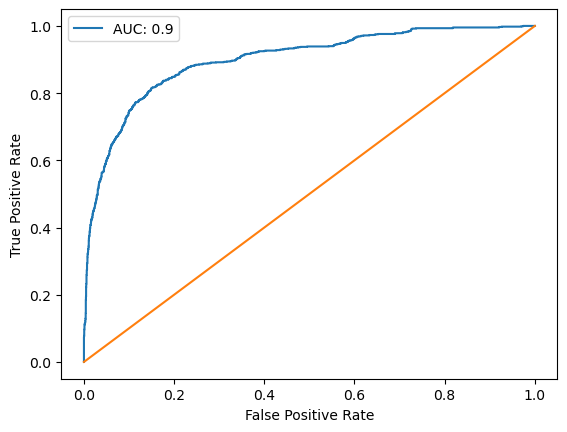

In [87]:
plt.plot(fpr,tpr,label='AUC: '+str(round(auc,2)))
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# MODEL CREATION

In [88]:
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC())
]

In [89]:
results = []

# Train and evaluate each classifier
for name, clf in classifiers:
    pipe = Pipeline(steps=[('scaler', StandardScaler()), ('classifier', clf)])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1 Score': report['1']['f1-score']
    })

In [90]:
results_df = pd.DataFrame(results)

In [91]:
results_df

Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.815217   0.796999  0.835338  0.815718
1           Random Forest  0.993659   0.987215  1.000000  0.993566
2       Gradient Boosting  0.892210   0.878027  0.905643  0.891621
3     K-Nearest Neighbors  0.936141   0.884615  1.000000  0.938776
4           Decision Tree  0.981884   0.964318  1.000000  0.981835
5  Support Vector Machine  0.941576   0.910345  0.976873  0.942436

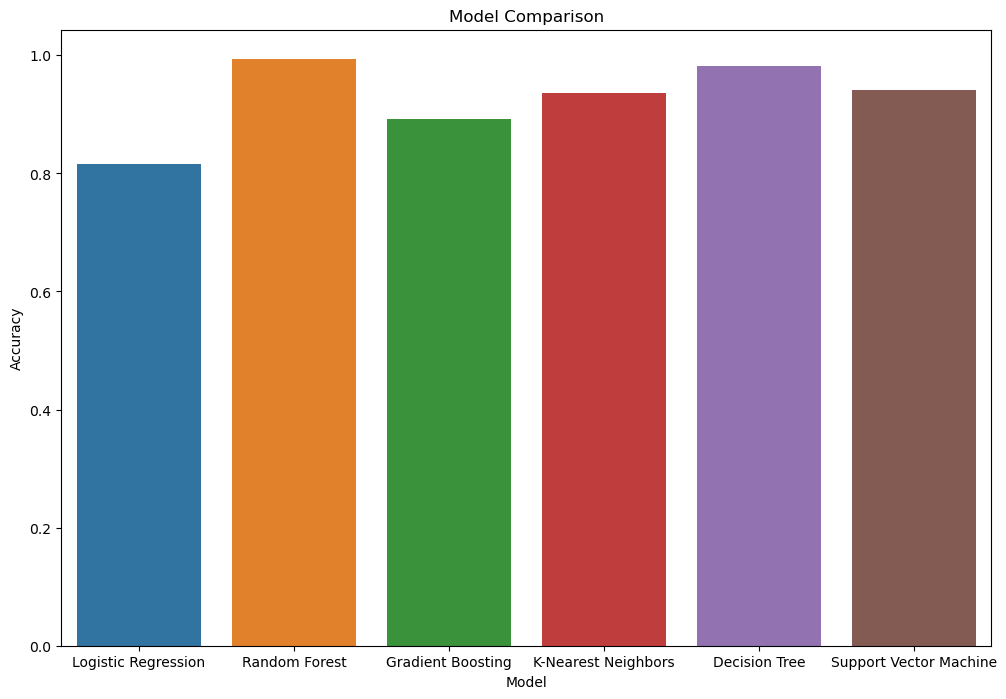

In [92]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Comparison')
plt.show()

In [93]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [94]:
feature_importances = rf_model.feature_importances_
features = x.columns


In [95]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


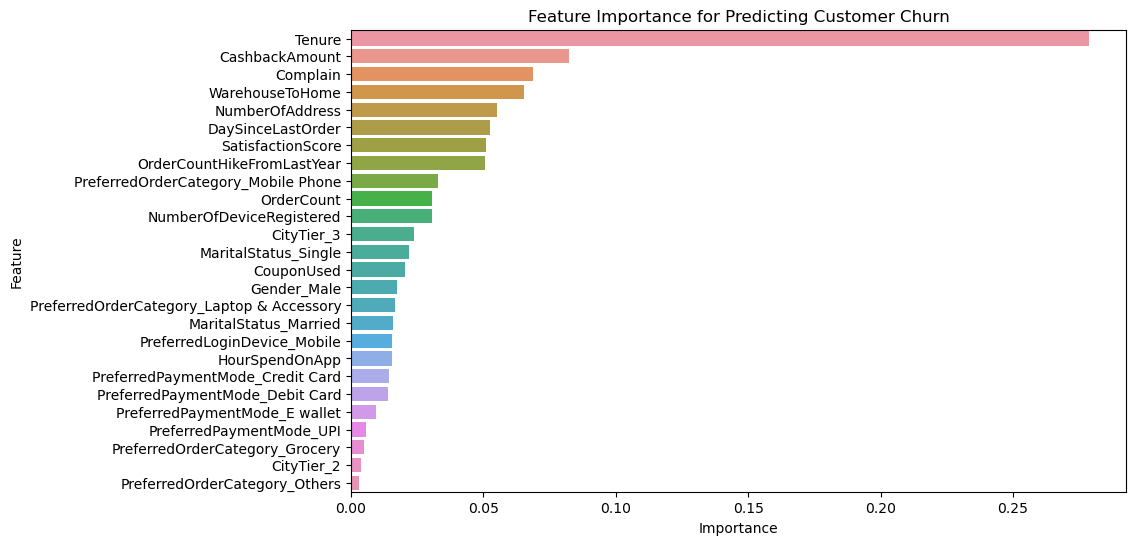

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Customer Churn')
plt.show()

In [97]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Evaluation
from sklearn.metrics import silhouette_score

#Scaling
from sklearn.preprocessing import StandardScaler

# Regular Expression
import re

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [98]:
cust_df = data2.copy()
cust_df = cust_df.rename(columns={"DaySinceLastOrder": "recency", "OrderCount": "frequency", 'CashbackAmount':'monetary'})

In [99]:
cust_df['recency'].quantile([0.25, 0.5, 0.75])

0.25    2.0
0.50    3.0
0.75    7.0
Name: recency, dtype: float64

In [100]:
label_r = range(4, 0, -1)
group_r = pd.qcut(cust_df['recency'], q=4, labels=label_r)
cust_df['R'] = group_r.values

In [101]:
cust_df["R"].unique()

[2, 3, 4, 1]
Categories (4, int64): [4 < 3 < 2 < 1]

In [102]:
cust_df[cust_df['R'].isna()]

Empty DataFrame
Columns: [CustomerID, Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferredOrderCategory, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderCountHikeFromLastYear, CouponUsed, frequency, recency, monetary, R]
Index: []

[0 rows x 21 columns]

In [103]:
df_R = cust_df.groupby(['R']).agg(n_customers=('CustomerID','nunique')).reset_index(drop = False)

df_R.loc[df_R['R'] == 4, 'R_group'] = 'most active'
df_R.loc[df_R['R'] == 3, 'R_group'] = 'active'
df_R.loc[df_R['R'] == 2, 'R_group'] = 'less active'
df_R.loc[df_R['R'] == 1, 'R_group'] = 'innactive'

df_R['R_percent'] = round(df_R['n_customers']/df_R['n_customers'].sum()*100, 2)

df_R
     

R  n_customers      R_group  R_percent
0  4         1711  most active      31.91
1  3         1182       active      22.04
2  2         1176  less active      21.93
3  1         1293    innactive      24.11

In [104]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')

In [105]:
recency_cust = cust_df['CustomerID'].groupby(cust_df['recency']).count()

# Visualization
fig = go.Figure()
# Create Layout
fig.update_layout(
    title='Recency Segmentation',
    xaxis_title='Days (since last transactions)',
    yaxis_title='Total Customers',
    showlegend=False)
# Plot Area Chart
fig.add_trace(go.Scatter(x=recency_cust.index, 
                         y=recency_cust.values, 
                         fill='tozeroy', 
                         mode='none'))
# Plot Line
fig.add_trace(go.Scatter( x=[2, 2], y=[0,1200],
                         mode="lines", 
                         marker=dict(size=12, line=dict(width=0.8),color='navy'), 
                         name='Q1 (2 days)'))
fig.add_trace(go.Scatter( x=[3, 3], y=[0,1000],
                         mode="lines", 
                         marker=dict(size=12, line=dict(width=0.8),color='navy'), 
                         name='Q2 (3 days)'))
fig.add_trace(go.Scatter( x=[7, 7], y=[0,1200],
                         mode="lines", 
                         marker=dict(size=12, line=dict(width=0.8),color='navy'), 
                         name='Q3 (7 days)'))
# Annotation
fig.add_annotation(x=2, y=1200,
            text="most Active: 33.78 %",
            showarrow=False,
            yshift=10)

fig.add_annotation(x=5.5, y=1000,
            text="active: 21.44 %",
            showarrow=False,
            yshift=10)

fig.add_annotation(x=7, y=1200,
            text="less active: 21.65 %",
            showarrow=False,
            yshift=10)

fig.add_annotation(x=12, y=1000,
            text="Inactive:  23.13 %",
            showarrow=False,
            yshift=10)
fig.show()

In [106]:
round(cust_df['monetary'].quantile([0.25, 0.5, 0.75]))

0.25    148.0
0.50    165.0
0.75    199.0
Name: monetary, dtype: float64

In [107]:
labels_m = range(1, 5)
group_m = pd.qcut(cust_df['monetary'], q = 4, labels = labels_m)
cust_df['M'] = group_m.values

In [108]:
cust_df["M"].unique()

[2, 1, 4, 3]
Categories (4, int64): [1 < 2 < 3 < 4]

In [109]:

df_M = cust_df.groupby(['M']).agg(n_customers=('CustomerID', 'nunique')).reset_index(drop = False)

df_M.loc[df_M['M'] == 1, 'M_group'] = 'low'
df_M.loc[df_M['M'] == 2, 'M_group'] = 'medium'
df_M.loc[df_M['M'] == 3, 'M_group'] = 'high'
df_M.loc[df_M['M'] == 4, 'M_group'] = 'very high'

df_M['M_percent'] = round(df_M['n_customers']/df_M['n_customers'].sum()*100, 2)

df_M

M  n_customers    M_group  M_percent
0  1         1341        low      25.01
1  2         1340     medium      24.99
2  3         1340       high      24.99
3  4         1341  very high      25.01

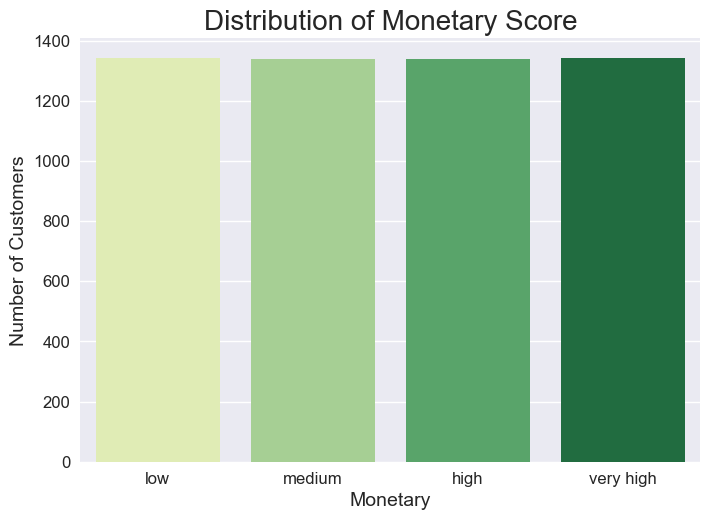

In [110]:
sns.barplot(x='M_group', y='n_customers', data=df_M, palette='YlGn')
plt.title('Distribution of Monetary Score',fontsize=20)
plt.xlabel('Monetary',fontsize=14)
plt.ylabel('Number of Customers',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
     


In [111]:
x = cust_df[['recency', 'frequency', 'monetary']]

# Scale
scaler = StandardScaler()

# Data Scale
x_scaled = scaler.fit_transform(x)
     

In [112]:
score = []
number_of_clusters = range(2,9)

for i in number_of_clusters:
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)

  label = kmeans.labels_
  score.append(silhouette_score(x_scaled, label, metric = 'euclidean'))

In [113]:
for i in range(len(score)):
  print(f'Silhoutte Score for {i+2} Cluster', round(score[i], 3))

Silhoutte Score for 2 Cluster 0.451
Silhoutte Score for 3 Cluster 0.412
Silhoutte Score for 4 Cluster 0.424
Silhoutte Score for 5 Cluster 0.45
Silhoutte Score for 6 Cluster 0.297
Silhoutte Score for 7 Cluster 0.443
Silhoutte Score for 8 Cluster 0.443


In [114]:
kmeans = KMeans(n_clusters=5, random_state=10)
kmeans.fit(x_scaled)

cust_df['label'] = kmeans.labels_
     

In [115]:
px.scatter_3d(cust_df, x = 'recency', y = 'frequency', z = 'monetary', color = 'label')

In [116]:

label = cust_df['label']
score = silhouette_score(x_scaled, label, metric = 'euclidean')
score
     

0.4504846733672128

In [117]:
def label(x):
  if x == 0:
    return 'New comer'
  elif x == 1:
    return 'Lost'
  elif x == 2:
    return 'high Spender'
  elif x == 3:
    return 'Medium Spender'
  else:
    return 'Loyal'

cust_df['label k-means'] = cust_df['label'].apply(label)
     

In [118]:
cust_df['label k-means'].value_counts()

label k-means
New comer         2793
Loyal              940
high Spender       754
Lost               616
Medium Spender     259
Name: count, dtype: int64

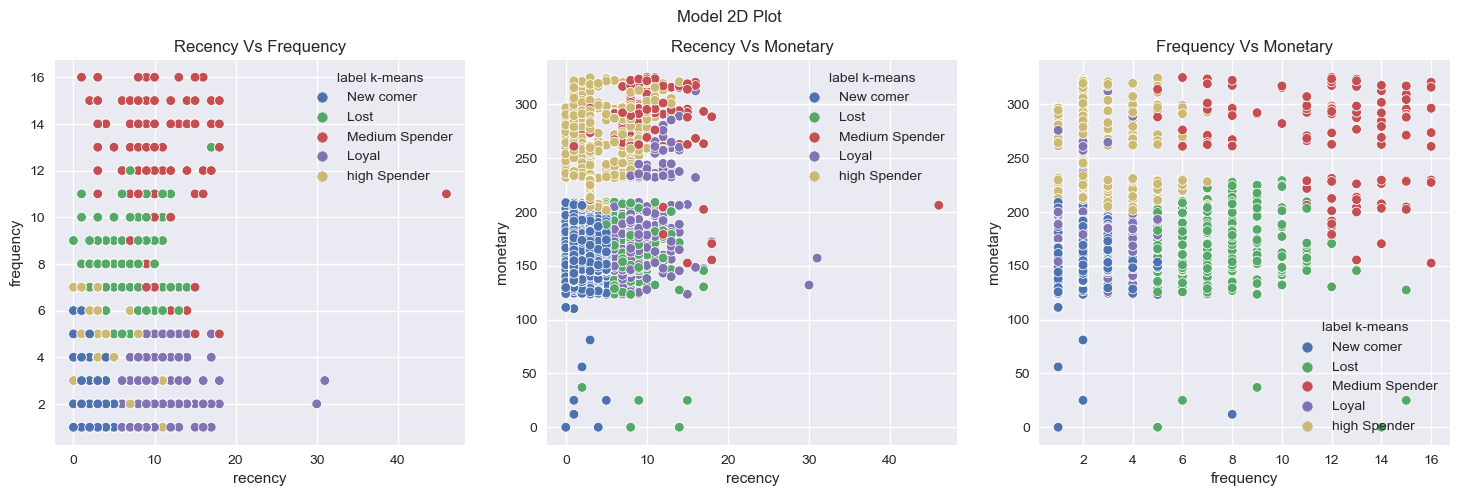

In [119]:
plt.figure(figsize =(18,5))

# Recency vs Frequency
plt.subplot(131)
sns.scatterplot(x = 'recency', y = 'frequency', hue = 'label k-means', data = cust_df)
plt.title('Recency Vs Frequency')

# Recency Vs Monetary
plt.subplot(132)
sns.scatterplot(x = 'recency', y = 'monetary', hue = 'label k-means', data = cust_df)
plt.title('Recency Vs Monetary')

# Frequency Vs Monetary
plt.subplot(133)
sns.scatterplot(x = 'frequency', y = 'monetary', hue = 'label k-means', data = cust_df)
plt.title('Frequency Vs Monetary')

plt.suptitle('Model 2D Plot')
plt.show()
     


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.14.0
